In [4]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
csv_path = 'data/VPA_Open_Space.csv'

read_csv = pd.read_csv(csv_path)

information_df = pd.DataFrame(read_csv)

information_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
0,1,BOROONDARA,3\LP28215,95086,VM Features of Interest,Tertiary institutions,Not applicable,State Government,Swinburne University Of Technology & Tafe Divi...,Existing,...,,,Restricted public land,,NO DATA,Swinburne University of Technology,https://lh3.googleusercontent.com/-QP2NylEZuhE...,1500,0.000742,1.698581e-08
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08


In [6]:
park_query = ['State Government', 'Local government']

information_df_parks_df = information_df.loc[(information_df['OS_CATEGOR'] == 'Parks and gardens') &
                                            (information_df['OS_TYPE'] == 'Public open space')]
information_df_parks_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08
12,13,BOROONDARA,1\TP178035,88229,VM Parcels,Parks and gardens,Not applicable,Local government,Hays Paddock,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1512,0.001186,7.312569e-08


In [7]:
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)
lga_list

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(lga_list['LGA'][i])
    
lga_bucket

['CASEY',
 'MORNINGTON',
 'WHITTLESEA',
 'KINGSTON',
 'WHITEHORSE',
 'HUME',
 'MORELAND',
 'WYNDHAM',
 'YARRA RANGES',
 'MONASH',
 'FRANKSTON',
 'BRIMBANK',
 'MELBOURNE',
 'BOROONDARA',
 'MANNINGHAM',
 'MELTON',
 'KNOX',
 'NILLUMBIK',
 'GREATER DANDENONG',
 'BANYULE',
 'CARDINIA',
 'MAROONDAH',
 'MOONEE VALLEY',
 'HOBSONS BAY',
 'YARRA',
 'MARIBYRNONG',
 'PORT PHILLIP',
 'DAREBIN',
 'STONNINGTON',
 'GLEN EIRA',
 'MITCHELL',
 'BAYSIDE']

In [8]:
lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))
lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')
lga_park_count

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))
    
park_count

[576,
 498,
 484,
 384,
 366,
 356,
 350,
 333,
 323,
 312,
 303,
 300,
 299,
 290,
 278,
 273,
 248,
 241,
 206,
 189,
 189,
 184,
 176,
 167,
 166,
 161,
 157,
 138,
 128,
 76,
 51,
 49]

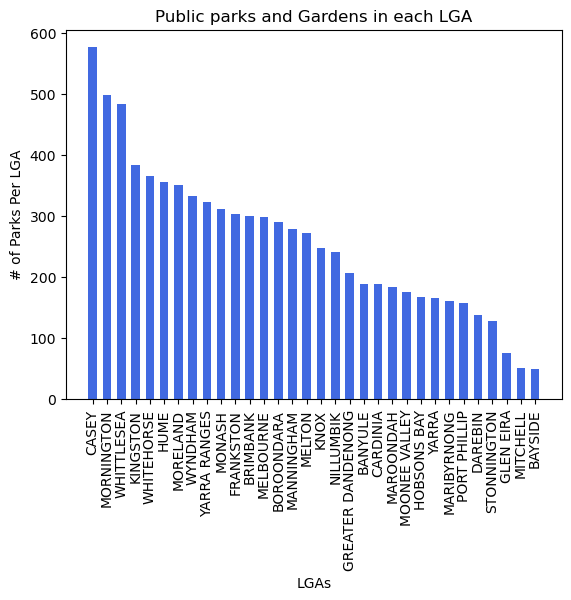

In [9]:
x_axis = np.arange(len(lga_bucket))

plt.bar(x_axis, park_count, color="royalblue", align="center", width = 0.6)
tick_locations = [value for value in x_axis]
tick_locations
plt.xticks(tick_locations, lga_bucket, rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('# of Parks Per LGA')
plt.title('Public parks and Gardens in each LGA')

plt.show()

In [10]:
lga_park_count_df = pd.DataFrame({"LGA Name" : lga_bucket, 
                                  "No of Parks" : park_count})
lga_park_count_df

,LGA Name,No of Parks
0,CASEY,576
1,MORNINGTON,498
2,WHITTLESEA,484
3,KINGSTON,384
4,WHITEHORSE,366
5,HUME,356
6,MORELAND,350
7,WYNDHAM,333
8,YARRA RANGES,323
9,MONASH,312
